# Lab21 : CNN Classification.
Realisé par : Hiba OUAZINE EMSI 2024-2025

## Reference : 
Dataset !wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip



In [20]:
!curl -L -o fruits.zip https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) schannel: next InitializeSecurityContext failed: CRYPT_E_NO_REVOCATION_CHECK (0x80092012) - La fonction de r�vocation n�a pas pu v�rifier la r�vocation du certificat.


In [21]:
!unzip fruits.zip

'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

# Step 1 : Dataset

In [3]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1501 files belonging to 10 classes.
Found 259 files belonging to 10 classes.
Found 478 files belonging to 10 classes.


### Dataset visualization

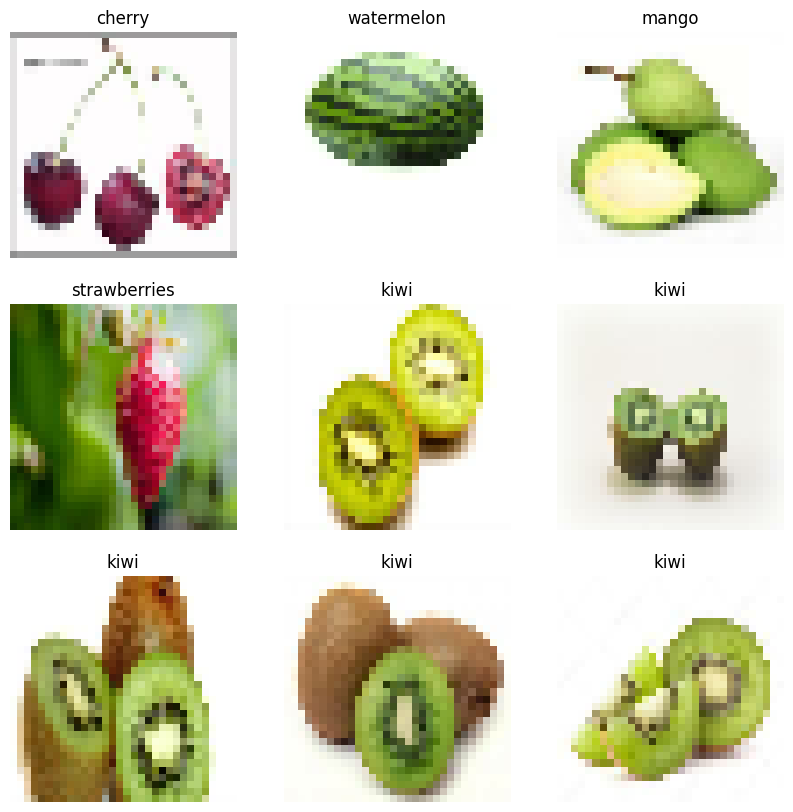

In [4]:
class_names = ["apple","avocado","banana","cherry","kiwi","mango", "orange","pineapple", "strawberries","watermelon"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

# Step 2 : Model

In [5]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255), # Normalization (Values betweeen 0 & 1)
     tf.keras.layers.Conv2D(32, 3, activation="relu"), # 32 Pixels from smaller scan
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(len(class_names)) 
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

# Step 3 : Train

In [6]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10


76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.2261 - loss: 2.1245 - val_accuracy: 0.3398 - val_loss: 1.5305
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4450 - loss: 1.3793 - val_accuracy: 0.5521 - val_loss: 1.2370
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5938 - loss: 1.1464 - val_accuracy: 0.5135 - val_loss: 1.1225
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6111 - loss: 1.0747 - val_accuracy: 0.5251 - val_loss: 1.1748
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6352 - loss: 1.0095 - val_accuracy: 0.6216 - val_loss: 1.0124
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6635 - loss: 0.9235 - val_accuracy: 0.6255 - val_loss: 0.9180
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7120 - loss: 0.8053 - val_accuracy: 0.6371 - val_loss: 0.9354
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7002 - loss: 0.7606 - val_accuracy: 0.6409 - val_loss: 0.

# Step 4 : Test

In [7]:
print(model.evaluate(test_ds)) # score and accuracy

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6468 - loss: 0.9986
[1.0095362663269043, 0.6589958071708679]


## Test visualization

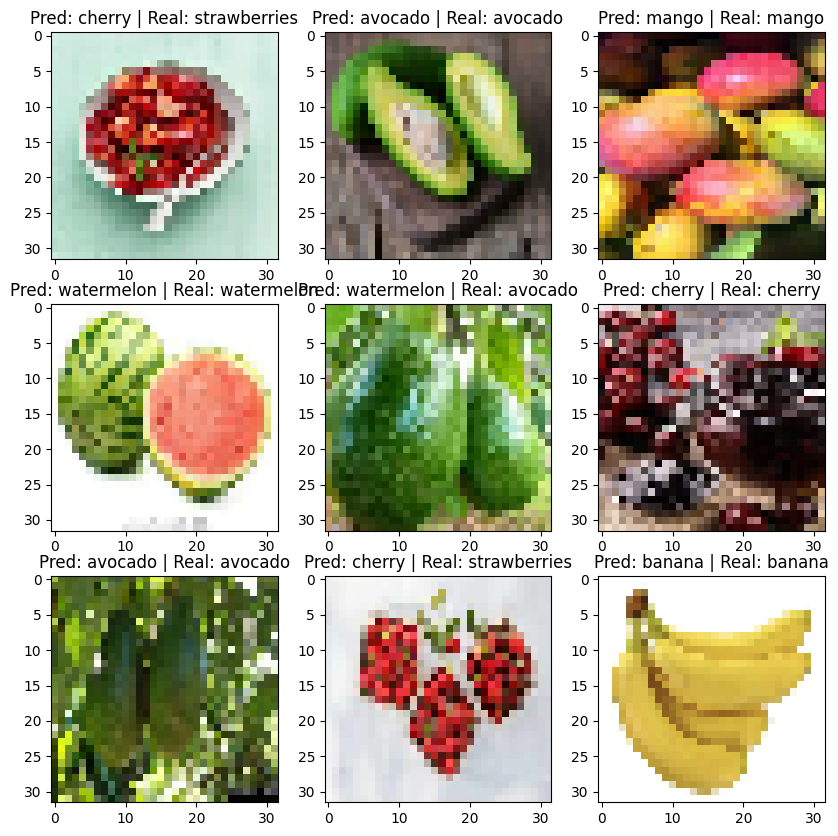

In [8]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])
plt.show()



# Save the MODEL

In [10]:
model.save("fruit_classification_model.h5")

In [59]:
model.summary() 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,608 (1.83 MB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,406 (1.22 MB)

## converting to tflite 

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('fruit_classification_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open('fruit_classification_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TFLite format and saved as 'fruit_classification_model.tflite'")


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjf5qaz4_\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpjf5qaz4_\assets


Saved artifact at 'C:\Users\HP\AppData\Local\Temp\tmpjf5qaz4_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1868102716304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102718992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102718608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102719760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102718224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102720528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102719568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102721680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102721872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1868102722640: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model succes

: 